# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [96]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

In [110]:
from statsmodels.formula.api import ols
lm = ols('tip ~ total_bill + C(sex) + C(day) + size', data=tips)
lm1= lm.fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     34.93
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           4.04e-30
Time:                        10:11:10   Log-Likelihood:                -347.66
No. Observations:                 244   AIC:                             709.3
Df Residuals:                     237   BIC:                             733.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6487      0.235      2.756      0.006       0.185       1.112
C(sex)[T.Female]     0.0326      0.141      0.231      0.818      -0.245       0.311
C(day)[T.Fri]        0.0789      0.269      0.293      0.770      -0.451       0.609
C(day)[T.Sat]       -0.0414      0.173     -0.239      0.811      -0.382       0.299
C(day)[T.Sun]        0.0725      0.181      0.400      0.690      -0.284       0.429
total_bill           0.0932      0.009     10.019      0.000       0.075       0.112
size                 0.1867      0.087      2.137      0.034       0.015       0.359
==============================================================================
Omnibus:                       26.163   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.406
Skew:                           0.571   Prob(JB):                     1.87e-11
Kurtosis:                       4.886   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

tip(sex,day,total_bill,size)= 0.6487 + 0.0326sex + 0.03667day+0.0932total_bill+ 0.1867size)

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

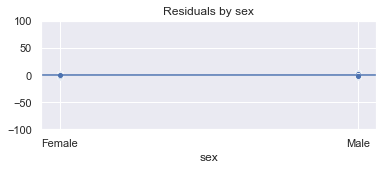

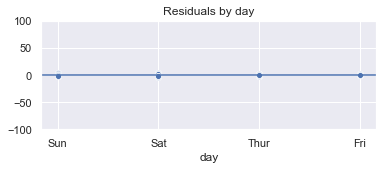

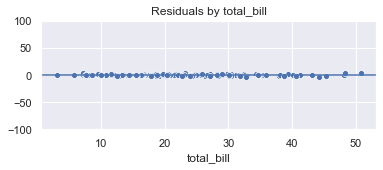

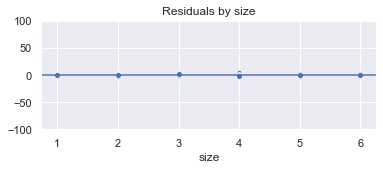

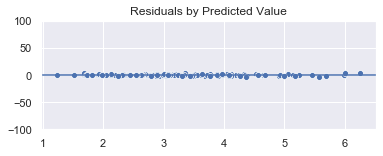

9.682600804927595e-16


In [109]:
for x in ('sex', 'day', 'total_bill','size'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(tips[x], lm.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
  
    plt.axhline(np.mean(lm.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lm.predict(), lm.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(lm.resid))
plt.show()

print(np.mean(lm.resid))

4) Does your model meet the four assumptions expected of a linear model? Explain:

It satisfies the assumptions expected: shows mean close to zero across the distribution, the vertical spread of points remains approximately constant across the graph, have an approximately normal distribution, and there are no visible influence from the regressors on the relationship. 